In [2]:
"""
ML automates analytical model building; obviates some explicit programming in data analysis
USES: Fraud detection, spam detection, network intrusion detection,
search result indexing, real-time ads, credit scoring, predicting equipment
failure, recommendation engines and pricing models, customer segmentation, sentiment analysis,
predicting customer churn, pattern & image recognition

-Supervised learning is trained using LABELED examples
-Algorithms learn using comparison between their output and actual expected correct outputs
-SL commonly used where historical information can predict likely future events

Supervised learning process:
1. DATA ACQUISITION -> 
2. DATA CLEANING/FORMATTING -> includes vectorization in NLP's case
   a. Each data should have a Y-label based on its X-features. 
   b. The Y-labels for test data are used to evaluate the model's effectiveness/predictiveness
3. DATA SEPARATION into train/test -> Training data is usually, ideally, about 70% of your data
   a. 4 data components after split: Y-test, X-test, Y-train and X-train
4. MODEL FITTING to training data -> Training data are often manually labeled
   a. separate True condition from Predicted condition of each data
   b. true/false positive/negative outputs are mapped in a CONFUSION MATRIX
   c. Type1 Error is false positive; type2 error is false negative
5. MODEL EVALUATION along 4 key metrics -> 
   a. ACCURACY - number of correct predictions, divided by total number of predictions
      1. useful when target classes are well-balanced, not useful with unbalanced classes
      2. a skewed dataset can generate >50% accuracy if all data are classified the same
   b. RECALL = true positives / (true positives + false negatives)
      1. evaluates model's ability to find ALL relevant cases in dataset
   c. PRECISION = true positives / (true positives + false positives)
      1. evaluates model's ability to find ONLY relevant cases in dataset
   d. F1-SCORE - harmonic mean of precision + recall; neutralizes tradeoff between
      1. F1 = 2*((precision * recall) / (precision + recall))
      2. harmonic mean is superior to average because it punishes extreme values;
      3. classifier with precision 1.0 and recall 0.0 has an F1 score of 0.
6. IMPROVE TEST/TRAIN Loop -> 
7. deploy model

Here we're using Python's most popular ML library, scikit-learn
Every algo is exposed in scikit learn via an "Estimator" which can set parameters
format: `from sklearn.[family] import Model
e.g.: `from sklearn.linear_model import LinearRegression
SKlearn comes with test-train split functionality
e.g. `X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
`predictions = model.predict(X_test)
Shift+tab in Jupyter can check the possible parameters
"""
import numpy as np
import pandas as pd

In [3]:
#file is separated by tab characters; we represent that in pandas pass
df=pd.read_csv('../smsspamcollection copy.tsv',sep='\t')

In [5]:
#displays data in chart
df.head()

label      0
message    0
length     0
punct      0
dtype: int64

In [14]:
#displays a "1" next to a field if a datum is missing that field
print("Null check: \n", df.isnull().sum())
#Shows number of rows in dataframe
print("Number of rows in dataframe: \n", len(df))
#shows number of unique classifiers under a certain column in dataframe
print("Set of labels: \n", df['label'].unique())
#shows counts of each type of data
print("Entries per label: \n", df['label'].value_counts())

Null check: 
 label      0
message    0
length     0
punct      0
dtype: int64
Number of rows in dataframe: 
 5572
Set of labels: 
 ['ham' 'spam']
Entries per label: 
 ham     4825
spam     747
Name: label, dtype: int64


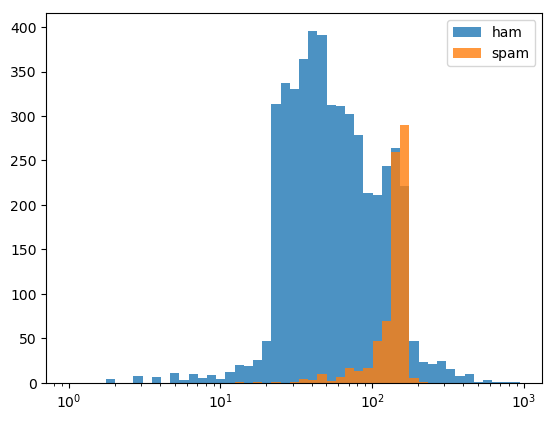

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

#display on logarithmic scale
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
#produces a histogram for each of ham and spam messages by length
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
#shows that these messages typically differ heavily in length
plt.legend(('ham','spam'))
plt.show()

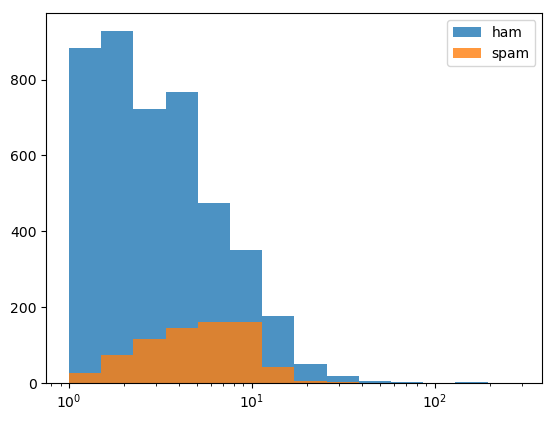

In [17]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
#produces a histogram for each of ham and spam messages by punctuation volume
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
#shows that these messages typically differ slightly in punctuation
plt.legend(('ham','spam'))
plt.show()

In [18]:
#so spam tends to be longer and have less punctuation
from sklearn.model_selection import train_test_split

In [20]:
#X is feature data
X=df[['length','punct']]
#Y is our label
y=df['label']
#utilizes a random state variable to randomly split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
#this print should demonstrate that the values have been randomly selected
print("full X_test: \n", X_test)

X_train: (3900, 2)
X_test: (1672, 2)
full X_test:       length  punct
3245     147     14
944      116      1
1044     102      3
2484      45      0
812      112      4
2973      65      2
2991     126      7
2942      95      3
230       34      0
1181      26      3
1912      92      3
1992     119      5
5435      33      4
4805     110      2
401      156      3
1859      32      2
1344     159      8
2952      32      1
501      149      4
3337      28      3
1945      72      4
3142      30      0
2422      83      8
381      300     14
5567     160      8
4937      24      7
79        76      4
5240      48      5
2554      34      1
5345      16      1
...      ...    ...
1170     146      4
1391     155      6
4337      68      7
220      159      5
1662      75      4
627       66      1
3545      84      3
2809      61      4
83        36      0
3102      28      1
790       28      0
2476      29      0
461       62      1
4907      32      0
551      281      9
3375      

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_model = LogisticRegression(solver='lbfgs')
#reports back with the model used, along with all training data used
lr_model.fit(X_train,y_train)
#now we'll test the accuracy of the model
predictions = lr_model.predict(X_test)
print("X_test predictions: \n", predictions)
#now construct a confusion matrix to understand results
#In this case, we only correctly classified 5 spam texts, with 44 FP and 219 FN
print("\n Confusion Matrix:")
df2 = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), 
                   index=['true ham','true spam'], columns=['predict ham','predict spam'])
print(df2)
print("\n Classification report:")
#it's good at detecting ham, but not spam
print(metrics.classification_report(y_test,predictions))
print("\n Accuracy score between predictions and test data:")
print(metrics.accuracy_score(y_test,predictions))

X_test predictions: 
 ['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']

 Confusion Matrix:
           predict ham  predict spam
true ham          1404            44
true spam          219             5

 Classification report:
              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672


 Accuracy score between predictions and test data:
0.8427033492822966


In [30]:
#Naive bayes model
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)
predictions = nb_model.predict(X_test)
#correctly identifies 0 spam; 0 precision and 0 recall for spam
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))

[[1438   10]
 [ 224    0]]


In [32]:
#support vector machine model
from sklearn.svm import SVC
svc_model=SVC(gamma='auto')
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1373   75]
 [ 121  103]]
